# Resolución numérica de ecuaciones no lineales

Autor de esta versión: **Juan Antonio Villegas Recio**

Autor de la versión original: Pedro González Rodelas

Fecha de la primera versión: 10/08/2017

Sucesivas revisiones: 15/08/2017, 19/10/2018, 15,22/03/2020 y 20/04/2020, 24/03/2021

Fecha de la última revisión: 10/4/2025

Notebook adaptado y extendido a partir del notebook original realizado con Mathematica e incluido en el libro: "*Análisis Numérico con Mathematica*" de Ariel Ciencia

En esta práctica vamos a usar varios procedimientos computacionales ya implementados en alguno de los módulos o librerías de Python, así como revisar e implementar nosotros mismos otros métodos numéricos varios para calcular o aproximar las raíces, también llamados ceros, de una cierta función $f(x)$ en un intervalo $[a,b]$ de la recta real.

## 1. Carga de los módulos y funciones empleadas 🔨

Antes de empezar a realizar cualquier cálculo numérico o simbólico debemos de cargar los correspondientes módulos de Python que implementan la mayoría de funciones y procedimientos necesarios para ello: [`numpy`](https://numpy.org/) y [`sympy`](https://www.sympy.org/), que serán cargados con los pseudónimos `np` y `sp`, respectivamente. Además cargaremos también el submódulo `pyplot`, del paquete [`matplotlib`](https://matplotlib.org/), que nos permitirá realizar las representaciones gráficas que nos ayudarán a visualizar todo el proceso.

In [1]:
# Carga de librerías necesarias
import numpy as np
from numpy import sign
import sympy as sp
%matplotlib inline
import matplotlib.pyplot as plt

from decimal import * # Este módulo nos permitirá trabajar con una precisión determinada
getcontext()

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [2]:
mporig = getcontext().prec
mporig  # Esta sería la precisión con la que se trabaja por defecto

28

## 2. Primeros métodos simbólicos y numéricos de obtención de raíces 🚥

### 2.1. Primer intento: Obtener las raíces simbólicas 🔣

En un primer momento podríamos intentar tratar de obtener simbólicamente la o las posibles raíces. Para trabajo simbólico podemos utilizar el módulo `sympy`. Primero definiremos una variable simbólica usando la función `Symbol` y definiremos la función de la cual queremos conocer su raíz o raíces.

In [3]:
x = sp.Symbol('x') # Ahora cada vez que usemos x se referirá a la variable simbólica
x

x

Como primer ejemplo, supongamos que queremos conocer las raices de la funcion $f(x)=e^x-3$, $x\in\mathbb R$. Como primero vamos a trabajar en simbólico utilizaremos la función `exp` de `sympy`, pero cuidado porque `numpy` también posee una funcion llamada `exp`. La diferencia entre estas dos funciones es que la de `sympy` trabaja en simbólico y la de `numpy` en numérico, aunque los valores en sí son los mismos en ambos casos. Observa las siguientes celdas:

In [4]:
def fsym(x):
    ''' Version simbolica de la función'''
    return sp.exp(x)-3

fsym(x), fsym(1)

(exp(x) - 3, -3 + E)

In [5]:
def fnum(x):
    ''' Version numerica de la función'''
    return np.exp(x)-3

fnum(1) #, fnum(x) # No se puede evaluar la función simbólica en este caso

-0.2817181715409549

In [6]:
# De momento nos quedamos con la versión simbólica de la función
f = fsym

In [7]:
a, b = 0, 2 # Intervalo de búsqueda de la raíz
f(a),f(b) # Evaluamos la función en los extremos del intervalo

(-2, -3 + exp(2))

In [8]:
# Observamos el signo de la función en los extremos del intervalo
sign(f(a)*f(b))

-1

Como la función es continua y derivable en $[0,2]$ y ademas tiene signo distinto en los extremos, entonces sabemos a ciencia cierta, por el teorema de Bolzano, que existe al menos una raíz en dicho intervalo.

A continuación usamos la funcion `sp.plot` para representar la función en el intervalo deseado.

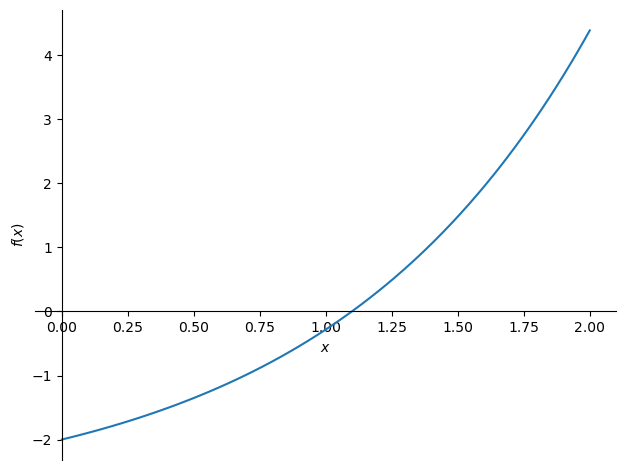

In [9]:
sp.plot(f(x),(x,a,b))

En efecto hay una raíz. En este caso concreto podemos usar la función `sp.solve` para obtenerla.

In [10]:
sol_exact = sp.solve(f(x),x)[0] # Solución exacta de la ecuación f(x)=0
print(sol_exact)

log(3)


In [11]:
sol_exact.evalf()

1.09861228866811

No obstante, es bien sabido que no siempre es posible, ni fácil, encontrar simbólicamente las raíces de ciertas ecuaciones de tipo trascendente o incluso polinómicas de grado superior. Por ello es habitual y más recomendable emplear algún método numérico para aproximar las posibles raíces de las ecuaciones de tipo no lineal. En todo caso, lo primero que tenemos que hacer es estudiar si efectivamente dicha ecuación puede tener soluciones reales y comprobar que se dan las condiciones adecuadas para poder aplicar el método correspondiente. Muchas veces lo mejor será ayudarnos previamente,  siempre que podamos, con una representación gráfica de la función en un intervalo apropiado. De esta manera, la ecuación tendrá una interpretación geométrica muy clara, como la búsqueda de los puntos de corte de la gráfica de dicha función con el eje $OX$.

### 2.2. Segundo intento: Aproximar las raíces de forma numérica 🔢

In [12]:
# ahora nos interesará emplear la versión numérica de la función
# por lo que nos convendrá intercambiar la definición de f(x)
f = fnum

En el siguiente código definimos un array de `numpy` (que no es lo mismo que una lista convencional) correspondiente a los valores de `num_points` valores reales equiespaciados entre `a` y `b`. Aplicamos la funcion `f` a cada uno de esos valores. Obsérvese que estamos pasando una colección de números como argumento a `f` y no un único valor. Esto es parte de la potencia de `numpy` para el cálculo numérico.

In [13]:
num_points = 100
x_values = np.linspace(a,b,num_points)
y_values = f(x_values)
x_values, y_values # Valores de x e y para graficar la función

(array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
        0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
        0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
        0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
        0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
        0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
        0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
        0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
        0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
        0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
        1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
        1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
        1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
        1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
        1.41414141, 1.43434343, 1.45454545, 1.47

In [14]:
# Tambien podiamos haber hecho
y_values = np.array([f(x) for x in x_values])
# o incluso
y_values = np.array(list(map(f,x_values))) # Version con map
# pero ambas son más lentas que la versión vectorizada

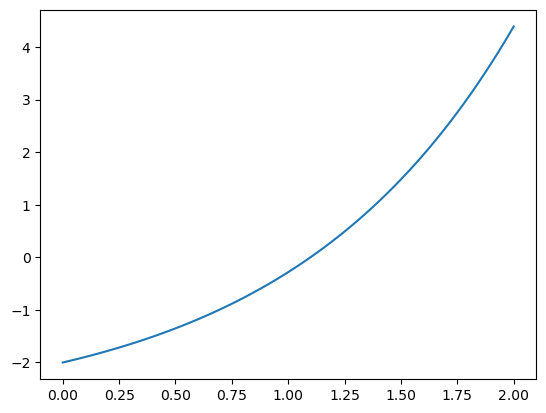

In [15]:
# Graficamos la función utilizando matplotlib
plt.plot(x_values,y_values)

Con la ayuda de este gráfico podemos intuir dónde podría estar el punto de corte de dicha gráfica con el eje $Ox$, no obstante convendría ajustar alguna de las opciones por defecto de los gráficos de MatPlotlib con el objeto de poder controlar la posición exacta de los ejes, por ejemplo.

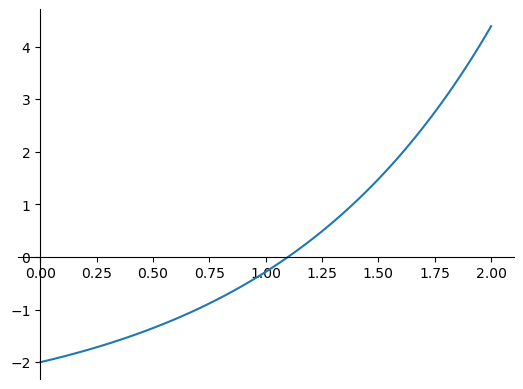

In [16]:
# Con plt.subplots() generamos una instancia de la clase Figure y
# una de la clase Axes, que nos permite graficar en ella e incluso incluir
# varios gráficos en la misma figura.
fig, ax = plt.subplots()

# Si queremos evitar que se dibujen los ejes derecho y superior de la figura
ax.spines['right'].set_color('none')    # borde derecho
ax.spines['top'].set_color('none')      # borde superior

# Fijar la posición de las marcas en la parte inferior
ax.xaxis.set_ticks_position('bottom')
# Situar el eje Ox en la recta horizontal y=0
ax.spines['bottom'].set_position(('data',0))


# Fijar la posición de las marcas a la izquierda del eje Oy
ax.yaxis.set_ticks_position('left')
# Situar el eje Oy en la recta vertical x=0
ax.spines['left'].set_position(('data',0))

# Mostramos el gráfico despues de las modificaciones
ax.plot(x_values, y_values)

Vemos claramente que esta función posee una raíz, también llamado cero o punto de corte con el eje $Ox$ cerca del valor real $1.0$ y en todo caso comprendido entre los valores $1.0$ y $1.5$. Esta simple idea de ir acotando el cero de una función *continua* entre dos valores reales, entre los cuales se encuentre el punto de corte con el eje $Ox$, podría servirnos para aproximar cada vez más dicho cero o raíz, pudiéndose realizar todo este proceso de manera gráfica, como veremos a continuación.

In [17]:
a_1, b_1 = 1.0, 1.5 # Intervalo de búsqueda de la raíz
x_values_1 = np.linspace(a_1,b_1,num_points)
# y_values_1 = f(x_values_1)
y_values_1 = np.array(list(map(f, x_values_1)))

El siguiente código muestra el gráfico original con un pequeño subgráfico con zoom alrededor de la raíz.

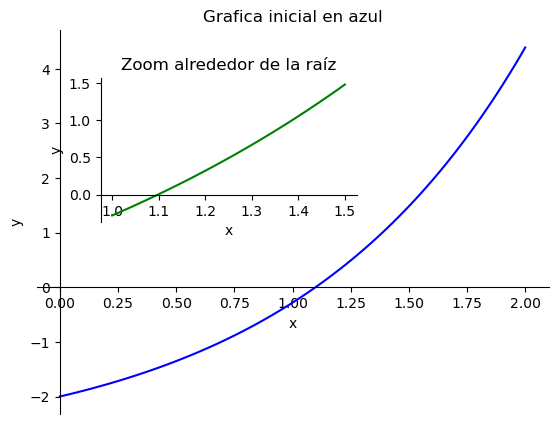

In [18]:
fig = plt.figure()

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # Ejes principales, https://www.geeksforgeeks.org/matplotlib-figure-figure-add_axes-in-python/
ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # Ejes insertados

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.spines['bottom'].set_position(('data',0))
ax1.yaxis.set_ticks_position('left')
ax1.spines['left'].set_position(('data',0))

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.spines['bottom'].set_position(('data',0))
ax2.yaxis.set_ticks_position('left')
# ax2.spines['left'].set_position(('data',0))

# Figura principal
ax1.plot(x_values, y_values, 'b')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Grafica inicial en azul')

# Subfigura insertada
ax2.plot(x_values_1, y_values_1, 'g')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Zoom alrededor de la raíz');

Repitamos el proceso varias veces, hasta que consigamos acotar el cero de esta misma función, con un error inferior a una milésima por ejemplo, modificando convenientemente los límites $a_1$ y $b_1$ del subintervalo considerado para representar solamente un zoom de su gráfica inicial en el subintervalo adecuado.

In [19]:
a_2, b_2 = 1.098, 1.099
x_values_2 = np.linspace(a_2,b_2,num_points)
y_values_2 = f(x_values_2)
y_values_2 = np.array(list(map(f, x_values_2)))

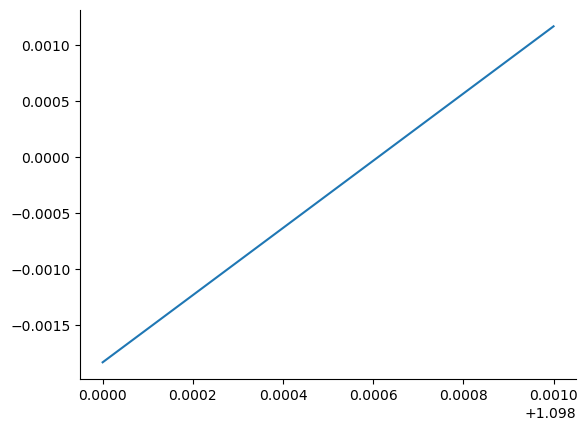

In [20]:
fig, ax = plt.subplots()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
# ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.plot(x_values_2, y_values_2)

Esta misma idea también es la base de otros métodos numéricos. En todos ellos partimos de que se dan las hipótesis del conocido teorema de Bolzano para la función $f$ en cierto intervalo de su dominio de definición; esto es, continuidad en dicho intervalo y cambio de signo para los valores de la función en los extremos del mismo. Así podremos  tener asegurada la existencia de al menos una raíz de la ecuación $f(x)=0$ en dicho intervalo.

En esta misma idea se basan los denominados métodos de *bisección* y el de *regula-falsi*, que chequean en todo momento que el preceptivo cambio de signo entre los valores de la función en los extremos del subintervalo considerado en cada iteración del método sigue teniendo lugar.

### 2.3. Método de búsqueda incremental 🔍📈

Por otra parte, el denominado *método de búsqueda incremental* también va chequeando valores de la función continua en puntos sucesivos $x_i < x_{i+1} = x_i + \Delta x $ para un cierto valor adecuado del incremento $\Delta x > 0$. De manera que , si la función tiene ceros en el intervalo de partida y elegimos adecuadamente este valor del incremento, podremos localizar y aislar al menos algunos de ellos con este rudimentario procedimiento, aunque por supuesto que también adolece de algún que otro inconveniente:
* Es posible que pasemos por alto sin detectar varios ceros demasiado próximos, si el incremento $\Delta x$ no es lo suficientemente pequeño.
* Las raíces dobles (ceros que coinciden) no serán detectadas por este tipo de procedimientos, ya que no necesariamente involucran cambio de signo.
* Ciertas singularidades o discontinuidades de la función pueden dar lugar a incongruencias o falsos ceros, si no se verifica previamente la continuidad de la función en los subintervalos considerados.

Veámos a continuación una posible implementación en forma de módulo o función de este sencillo procedimiento.

In [21]:
def busqueda_incremental(f,a,b,dx):
    x1, x2 = a, a + dx
    f1, f2 = f(x1), f(x2)
    while np.sign(f1) == np.sign(f2):
        if x1 >= b:
            return None,None   # se podría cambiar por x2 >= b
        x1, x2 = x2, x2 + dx
        f1, f2 = f2, f(x2)
    else: # si no se cumple la condición del while
        return x1,x2

In [87]:
# recordemos qué función tenemos definida en este momento
?f

Signature: f(x)
Docstring: <no docstring>
File:      /tmp/ipykernel_14114/2745055007.py
Type:      function

In [23]:
a,b # así como el intervalo del que partíamos

(0, 2)

In [24]:
# Comprobamos si la función tiene el mismo signo en los extremos del intervalo
np.sign(f(a)) != np.sign(f(b))

True

Empecemos realizando ahora una búsqueda incremental con paso de una décima (`dx = 0.1`) y sigamos refinando la búsqueda con pasos correspondientes a una centésima (`dx = 0.01`), una milésima (`dx = 0.001`), etc. Otra idea útil sería tomar como aproximación de la raíz el punto medio de cada uno de los sucesivos intervalos en los que hayamos encajado la misma. Así tendremos asegurado que el error cometido será inferior a dicho valor del incremento `dx`.

In [25]:
dx = 0.1
a1,b1 = busqueda_incremental(f,a,b,dx) # búsqueda incremental con décimas
print(f"a1={a1},b1={b1}")
print (f"Estimación de la raíz (dx={dx}): {(a1+b1)/2}")

a1=0.9999999999999999,b1=1.0999999999999999
Estimación de la raíz (dx=0.1): 1.0499999999999998


In [26]:
dx = 0.01
a2,b2 = busqueda_incremental(f,a1,b1,dx) # búsqueda incremental con centésimas
print(f"a2={a2},b2={b2}")
print (f"Estimación de la raíz (dx={dx}): {(a2+b2)/2}")

a2=1.0899999999999999,b2=1.0999999999999999
Estimación de la raíz (dx=0.01): 1.0949999999999998


In [27]:
dx = 0.001
a3,b3 = busqueda_incremental(f,a2,b2,dx) # búsqueda incremental con milésimas
print(f"a3={a3},b3={b3}")
print (f"Estimación de la raíz (dx={dx}): {(a3+b3)/2}")

a3=1.097999999999999,b3=1.0989999999999989
Estimación de la raíz (dx=0.001): 1.098499999999999


In [28]:
print(f"Valor exacto de la raíz {sol_exact.evalf()}")

Valor exacto de la raíz 1.09861228866811


También vamos a guardar dicho procedimiento en un fichero de Python `busqueda_incremental.py` en nuestro directorio de trabajo, por si queremos usarlo posteriormente en una sesión de Python desde la terminal o bien desde cualquier sistema integrado de desarrolo (IDE, de las siglas en inglés).

In [29]:
%pwd # esta orden de IPython se traduciría en la correspondiente
# del sistema operativo que nos muestra dicho directorio de trabajo

'/home/jesusmuve'

In [30]:
%%writefile busqueda_incremental.py
# -*- coding: UTF-8 -*-
## modulo busqueda_incremental
'''
x1,x2 = busqueda_incremental(f,a,b,dx)
buscará dentro del intervalo [a,b] en incrementos de dx una acotación
de la forma [x1,x2] de la raíz más pequeña de f(x) en dicho intervalo.
Se devolverá x1 = x2 = None en caso de no encontrarse ninguna.
'''
# global f,a,b,dx

def busqueda_incremental(f,a,b,dx):
    x1, x2 = a, a + dx
    f1, f2 = f(x1), f(x2)
    while np.sign(f1) == np.sign(f2):
        if x1 >= b:
            return None,None   # se podría cambiar por x2 >= b
        x1, x2 = x2, x2 + dx
        f1, f2 = f2, f(x2)
    else: # si no se cumple la condición del while
        return x1,x2

Overwriting busqueda_incremental.py


Por otra parte, en todos y cada uno de los métodos que se presentan a continuación será absolutamente necesario evitar la posibilidad de entrar en un posible "bucle infinito", que dejaría bloqueado al programa e incluso al sistema operativo del ordenador en el caso de que no consigamos interrumpir los cálculos.

### 2.4. Precisión y tolerancia 🎯

Tendremos pues que idear unos ciertos criterios de parada, de manera que el proceso se detenga cuando los resultados obtenidos se diferencien en menos de un cierto valor, que será la tolerancia o error máximo permitido, `tol`; o bien, cuando sean realizadas un número máximo de iteraciones, `nmax`, que indicaremos de antemano.

Por otro lado, para la comprobación de una posible raíz exacta de la ecuación, se ha implementado una condición del tipo
$|f(c)|<\varepsilon$, siendo $\varepsilon =10^{-\sigma }$ con $\sigma = 16$, que suele ser la precisión de la máquina cuando se trabaja en "doble precisión", que es lo habitual en cálculo numérico.

Esto es debido a que, a no ser que se efectuaran todos los cálculos de forma simbólica (con la consecuente ralentización del proceso), siempre se realizan con una precisión limitada, y, por lo tanto, hay que considerar de esta manera la posibilidad de encontrar un valor de la raíz, afectado siempre por errores de redondeo, muy próximo a la raíz exacta de la ecuación.

In [31]:
mp = 16                # Máxima precisión
getcontext().prec = mp #https://docs.python.org/3/library/decimal.html

In [32]:
prec = 10**(-mp)
prec

1e-16

También se ofrece la posibilidad de solicitar que se calculen o simplemente se muestren todos los resultados con un número de cifras significativas determinado por el usuario, que en todo caso debe ser igual o inferior al valor de la  Precision de la Máquina con la que se trabaje.

In [33]:
cifras = 5  # Número de cifras con el que queremos calcular
getcontext().prec = cifras # y presentar los resultados

In [34]:
tol = 10**(-cifras)     # Tolerancia
tol

1e-05

In [35]:
nmax = 100  # Número máximo de iteraciones

## 3. Algoritmos de resolución numérica de ecuaciones más empleados 💻

### 3.1. Método de Bisección 🙏

Método de bisección: https://es.wikipedia.org/wiki/M%C3%A9todo_de_bisecci%C3%B3n

A continuación tenemos la implementación del método de bisección (también llamado de bipartición). Recuerde que cuando se emplee este programa para aproximar una raíz de la ecuación $f(x)=0$ se debe elegir un intervalo de partida adecuado en cada caso, de manera que se verifiquen la hipótesis del teorema de Bolzano.

In [36]:
# Conviene guardar una copia de los extremos del
#  intervalo original, ya que los iremos modificando en cada iteración
a0, b0 = a, b
a,b

(0, 2)

Ejecutemos en primer lugar el algoritmo usando la doble precisión habitual de la máquina en coma flotante (usando 64 bits para almacenar los números de la clase `float`), que equivale a trabajar con unas 16 cifras significativas para todos los cálculos.

Primero mostramos el **método de bisección**.

In [37]:
def biseccion(f, a, b, nmax=nmax, tol=tol, prec=prec):
    niter = 0
    cont = True
    exit = ''
    while niter < nmax and cont:
        niter += 1
        c = (a+b)/2
        if abs(f(c)) < prec:    # Si |f(c)|< prec
            exit = 'precision'
            cont = False
        elif sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c

        if b-a < tol:
            exit = 'tolerancia'
            cont = False

    if exit == 'precision':
        print(f'Posiblemente solución exacta: {c}')
    elif exit == 'tolerancia':
        print(f'Aproximación solicitada: {c}')
    else:
        print('Se llegó al número máximo de iteraciones')
    return c, niter, exit

# evitar usar prints en funciones de cálculo

In [38]:
sol_approx, niter, exit = biseccion(f,a,b,nmax,tol,prec)
print('Solución exacta, ', sol_exact, ", con decimales  ", sol_exact.evalf() )
print('Número total de iteraciones ', niter)

Aproximación solicitada: 1.0986099243164062
Solución exacta,  log(3) , con decimales   1.09861228866811
Número total de iteraciones  18


In [39]:
sp.N(sol_approx, cifras), sol_approx, sp.N(sol_exact)

(1.0986, 1.0986099243164062, 1.09861228866811)

Repitamos ahora el mismo algoritmo, pero usando una precisión y número de cifras significativas concreto, indicado por el valor de la variable `cifras`. Para ello convirtamos previamente los valores extremos del intervalo al formato decimal determinado por la precisión que hemos forzado en este caso.

In [40]:
a,b = Decimal(a),Decimal(b)

In [41]:
a,b

(Decimal('0'), Decimal('2'))

In [42]:
getcontext().prec = cifras
sol_approx, niter, exit = biseccion(f,a,b,nmax,tol,prec)
print('Solución exacta, ', sol_exact, ", con decimales  ", sol_exact.evalf() )
print('Número total de iteraciones ', niter)

Posiblemente solución exacta: 1.0986
Solución exacta,  log(3) , con decimales   1.09861228866811
Número total de iteraciones  11


Vemos cómo, en efecto, se ha debido de  cumplir uno de los criterios de parada impuestos en un  número finito de iteraciones. Así pues,  el método ha sido capaz de calcular una aproximación de la raíz de la ecuación con algunas cifras decimales exactas;
esto lo podemos concluir en este caso ya que una variación pequeña, que ha sido el error máximo cometido o tolerancia, podría
cambiar como mucho  alguna de las últimas cifras decimales en una unidad y vemos que, en muchos de los casos, esto no afectaría por
errores de redondeo a las otras.

### 3.2. Método de la secante ✂️

https://es.wikipedia.org/wiki/M%C3%A9todo_de_la_secante

A continuación tenemos la implementación del método de la secante. Se construye iterativamente
una sucesión de valores:
$$x_{k+1}=x_k-\frac{x_k-x_{k-1}}{f\left(x_k\right)-f\left(x_{k-1}\right)}f\left(x_k\right)\\
=x_{k-1}-\frac{x_k-x_{k-1}}{f\left(x_k\right)-f\left(x_{k-1}\right)}f\left(x_{k-1}\right)$$
sin realizar la comprobación de cambio de signo.

Ahora bien, lo mismo que ocurría al emplear el método de bisección en la sección anterior,
debemos de idear algún criterio de parada cuando programamos cualquier método iterativo. Lo que haremos ahora, al no poder controlar de
forma tan clara como en el método de bisección el error absoluto cometido,  es fijarnos en la diferencia entre dos iteraciones consecutivas,
parando el proceso cuando ésta sea inferior a la tolerancia prefijada, **tol**; también fijaremos un número máximo de iteraciones
a realizar, en caso de que dicha tolerancia sea dificil de alcanzar en un número de iteraciones razonable.

> **Ejercicio 1.** Teniendo en cuenta la recomendación explicada sobre los criterios de parada, codifica una función similar a la explicada en el método de bisección para el método de la secante.
> 
> Aproxima la raíz de la función $f(x)=e^x-3$:
> * Cambiando la precisión a 5 cifras significativas.
> * Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

### 3.3. Métodos de Whittaker y Newton-Raphson 🍎

https://www.ecured.cu/M%C3%A9todo_de_Whittaker

https://es.wikipedia.org/wiki/M%C3%A9todo_de_Newton

Vamos a implementar en esta sección el llamado método de Whittaker que, a partir de un valor inicial $x_0$, utiliza en principio rectas
con pendiente fijada para calcular el punto de corte de éstas con el eje $Ox$ para aproximar la raíz buscada. No obstante, empleando
el programa resultante y permitiendo variar dichas pendientes, ajustándose a las de la propia función $f$, es decir, $m=f'\left(x_k\right)$, $k\geq 0$, para que sean las de la recta tangente en
el punto $\left(x_k,f\left(x_k\right)\right)$) obtendríamos el conocido método de  [Newton-Raphson](https://es.wikipedia.org/wiki/Método_de_Newton).

También se verá que para que este método funcione correctamente será necesario que la derivada de la función no esté próxima a cero,
al menos en cierto entorno de la raíz, ya que de lo contrario se podría producir una división entre cero o bien la creación
de enormes errores de redondeo al dividir entre cantidades muy pequeñas.

Sigamos pues con el ejemplo que teníamos desde el principio de la práctica, e intentemos representar gráficamente todo este proceso, pero también vamos a necesitar evaluar la función derivada de la función de partida. Para ello también podemos aprovechar la potencia de cálculo simbólico de Python, a través del módulo SymPy, para ayudarnos a calcular la función derivada. No obstante, para poder realizar los cálculos y aproximaciones numéricas posteriores, convendrá definir ambas funciones, tanto la función $f$ como su derivada, empleando las versiones de NumPy de las correspondientes expresiones.  

In [43]:
f = fsym    # Ahora trabajaremos con la versión simbólica

In [44]:
f(x),sp.diff(f(x),x)    # derivada simbólica de f

(exp(x) - 3, exp(x))

In [45]:
def df(x):##
    ''' Función sp.exp(x)
    Derivada simbólica de f en una función de python
    '''
    return sp.exp(x)

Le agradecemos a `sympy` su ayuda y volvemos a la versión numérica.

In [46]:
f = fnum
df = lambda x: np.exp(x)

In [47]:
a,b = 0, 2

In [48]:
f(a),df(a)

(-2.0, 1.0)

In [49]:
x0 = a
x0

0

In [50]:
m = 10
x1 = x0 - f(x0)/m
x1

0.2

In [51]:
abs(f(x1)) < prec

False

In [52]:
x0 = x1
x1 = x0 - f(x0)/m
x1

0.37785972418398306

In [53]:
abs(f(x1)) < prec

False

Repitiendo el mismo proceso se llega iterativamente a construir una sucesión que, si se dan ciertas condiciones apropiadas, va a converger hacia la verdadera raíz de nuestra ecuación. Para ello habrá que elegir convenientemente tanto el valor de la pendiente $m$ como el del valor inicial $x_0$, ya que basta probar con ciertos valores para darnos cuenta cómo nos aproximamos más y más a la raíz, o por el contrario nos alejamos.

> **Ejercicio 2.** Teniendo en cuenta estos primeros pasos, codifica una función para el método de Wittaker.
> 
> Aproxima la raíz de la función $f(x)=e^x-3$:
> * Cambiando la precisión a 5 cifras significativas.
> * Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.
> 
> Comprueba que una mala elección de $m$ puede provocar que la sucesión no converja.

> **Ejercicio 3.** Modifique el método anterior para que, en lugar de fijar una pendiente $m$, calcule en cada iteración la derivada de la función en dicho punto, obteniendo el método de Newton-Raphson. Con este método:
> 
> Aproxima la raíz de la función $f(x)=e^x-3$:
> * Cambiando la precisión a 5 cifras significativas.
> * Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.
> 
> Compare, en iguales condiciones, el rendimiento de Newton-Raphson con respecto al método de Wittaker.


**Ejercicios de esta primera parte**

> **Ejercicio 4.** Demuestre que la ecuación  $x^3+4 x^2=10  $  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$)?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.


> **Ejercicio 5.** Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con tolerancia $10^{-5}$ , partiendo de un valor adecuado, próximo a cada una de ellas en cada caso.
> 
> 1. $3x=2+x^2-e^x$.
> 
> 2. $x^2+10 \cos x+x=0$.


> **Ejercicio 6.** Para la función  $ f(x)= 3 x^2+e^x-1$,
> 
> i) encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos (tol =$10^{-4}$), y determine el número de iteraciones realizadas;
> 
> ii) encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$, partiendo de $x_0=0$, y determine el número de iteraciones realizadas.  

### 3.4. Métodos de iteración funcional:  métodos de Newton-Raphson y Steffensen 🔁

En los métodos de iteración funcional lo que se pretende es encontrar un [punto fijo](https://es.wikipedia.org/wiki/Método_del_punto_fijo) de la aplicación  $g:I\to I$ para
cierto subconjunto cerrado de la recta real (no necesariamente acotado) mediante una sucesión de valores $x_{k+1}=g\left(x_k\right), k\geq 0$. 
* Un ejemplo claro de esta metodología es el ya mencionado método de Newton-Raphson, donde buscamos los puntos fijos de la función $g(x)=x-\frac{f(x)}{f'(x)}$, obteniéndose una convergencia al menos cuadrática.
* Otro ejemplo es el método de Steffensen, en el que se tomaría $g(x)=x-\frac{f(x)^2}{f(x+f(x))-f(x)}$.

⚠️ **Nota:** No debe confundirse el método de Steffensen con el método de aceleración de la convergencia del mismo nombre, que se presentará más adelante.

In [54]:
# Implementación muy rudimentaria del método de Newton-Raphson

# Funcion f y f'
f  = lambda x : np.exp(x) - 3
df = lambda x : np.exp(x)

# Función g de iteración de Newton-Raphson
gNR = lambda x : x - f(x)/df(x)

x0  = 0     # Condición inicial
nmax = 100  # Número máximo de iteraciones

# Iteración funcional
xk_seq = [x0]
for k in range(nmax):
    xk_seq.append(gNR(xk_seq[-1])) # Añadimos a la lista el resultado de aplicar g al último elemento

aproxNR = xk_seq[-1] # Aceptamos como aproximación el último valor calculado

print(f"Aproximación tras {nmax} iteraciones: {aproxNR}")

Aproximación tras 100 iteraciones: 1.0986122886681096


> **Ejercicio 7.** Implemente el método de iteración funcional de Steffensen para una función $f$. En particular, para la función $f(x)=e^x-3$:
> * Represente gráficamente las funciones $g$ definidas tanto para el método de Newton-Raphson como para el método de Steffensen, comprobando que ambas poseen un punto fijo en la raíz de $f$.
> * Aproxima su única raíz utilizando el método de Steffensen:
>     * Cambiando la precisión a 5 cifras significativas.
>     * Con la precisión por defecto y aproximando la raíz con 28 cifras significativas.

### 3.5 Aceleración de la convergencia: métodos de Aitken y Steffensen 🚀

https://es.wikipedia.org/wiki/Proceso_%CE%94%C2%B2_de_Aitken

En el conocido método de Aitken se calcula una nueva sucesión de valores, $\left\{\hat{x_k}\right\}$, a partir de la original, $\left\{x_k\right\}$, mediante la fórmula siguiente:
$$\hat{x_k}=x_k-\frac{\left(x_{k+1}-x_k\right){}^2}{x_{k+2}-2x_{k+1}+x_k}$$

Veamos un ejemplo de aplicación de este método de aceleración, utilizando las iteraciones obtenidas previamente mediante el método
 equivalente al de Newton-Raphson.

In [55]:
n = 6
xk_seq = xk_seq[:n]
aproxNR = xk_seq[-1]

print(f"Solución exacta: {sol_exact.evalf()}")
print(f"Aproximación con {n} iteraciones de Newton-Raphson: {aproxNR}")
print(f"Error: {(aproxNR-sol_exact).evalf()}")

Solución exacta: 1.09861228866811
Aproximación con 6 iteraciones de Newton-Raphson: 1.0986126945317205
Error: 4.05863610810305E-7


In [56]:
hat_xk_seq = []
for k in range(n-2):
    xk, xk1, xk2 = xk_seq[k], xk_seq[k+1], xk_seq[k+2]
    hat_xk = xk - (xk1-xk)**2 / (xk2-2*xk1+xk)
    hat_xk_seq.append(hat_xk)

aprox_acel_aitken = hat_xk_seq[-1]
print(f"Solución exacta: {sol_exact}")
print(f"Aproximación con {n} iteraciones de Newton-Raphson: {aproxNR}")
print(f"Modificación mediante el método de aceleración de Aitken: {aprox_acel_aitken}")
print(f"Error (NR): {(aproxNR-sol_exact).evalf()}")
print(f"Error (Aitken): {(aprox_acel_aitken-sol_exact).evalf()}")

Solución exacta: log(3)
Aproximación con 6 iteraciones de Newton-Raphson: 1.0986126945317205
Modificación mediante el método de aceleración de Aitken: 1.0985928854455327
Error (NR): 4.05863610810305E-7
Error (Aitken): -0.0000194032225770061


Recordemos que estos métodos de aceleración de la convergencia están especialmente indicados para mejorar las iteraciones obtenidas por un método con convergencia lineal, en contra del caso del método de Newton-Raphson para raíces simples, que sabemos que tiene convergencia cuadrática.

En cuanto al método de aceleración de Steffensen, recuerde que se obtiene una nueva sucesión de valores, de tres en tres $\left\{\hat{x_0}{}^{(k)},\hat{x_1}{}^{(k)},\hat{x_2}{}^{(k)}\right\}$,
a partir de los tres primeros de la original, $\left\{x_0,x_1,x_2\right\}$, de la siguiente manera:
$$
\hat{x_0}{}^{(k+1)}=\hat{x_0}{}^{(k)}-\frac{\left(\hat{x_1}{}^{(k)}-\hat{x_0}{}^{(k)}\right){}^2}{\hat{x_2}{}^{(k)}-2\hat{x_1}{}^{(k)}+\hat{x_0}{}^{(k)}}
$$,

$\hat{x_1}{}^{(k)}=g\left(\hat{x_0}{}^{(k)}\right)$,  $\hat{x_2}{}^{(k)}=g\left(\hat{x_1}{}^{(k)}\right)$, 

siendo  $\left\{\hat{x_0}{}^{(0)},\hat{x_1}{}^{(0)},\hat{x_2}{}^{(0)}\right\}=\left\{x_0,g\left(x_0\right),g\left(x_1\right)\text{}\right\}$.


> **Ejercicio 8.** Implemente el método de aceleración de la convergencia de Steffensen y aplíquelo a una sucesión de valores obtenidos mediante iteración funcional de Newton-Raphson a la función $f(x) = e^x -3$. Compare las aproximaciones tras 4 iteraciones del método de Newton-Raphson, aceleración de la convergencia de Aitken y aceleración de la convergencia de Steffensen.

## 4. Órdenes directas de Python 🐍

### 4.1. Resolución de ecuaciones en general 🔧

Aparte de todo esto *Python* también incorpora varias funciones y órdenes directas, o incluidas en alguno de los módulos más habituales, para aproximar los ceros de una función, ya sea de manera simbólica o bien mediante algoritmos de tipo bisección o Newton-Raphson, sin necesidad de acudir al código ya implementado anteriormente.

#### Opción 1: Búsqueda de soluciones exactas con el submódulo [`solvers`](https://docs.sympy.org/latest/modules/solvers/solvers.html) de `sympy`. 

[Documentación de ejemplos y métodos de resolución de ecuaciones con Sympy](https://docs.sympy.org/latest/guides/solving/index.html)

En este módulo encontramos órdenes para buscar raíces exactas de ciertos tipos de ecuaciones. Entre ellas descatamos  [`solve`](https://docs.sympy.org/latest/modules/solvers/solvers.html#sympy.solvers.solvers.solve) y su variante [`solveset`](https://docs.sympy.org/latest/modules/solvers/solveset.html).

También necesitamos definir las variables simbólicas que necesitemos (aunque en este caso ya estaba definida).

In [57]:
x = sp.Symbol('x')

In [58]:
?sp.solve

Signature: sp.solve(f, *symbols, **flags)
Docstring:
Algebraically solves equations and systems of equations.

Explanation

Currently supported:
    - polynomial
    - transcendental
    - piecewise combinations of the above
    - systems of linear and polynomial equations
    - systems containing relational expressions
    - systems implied by undetermined coefficients

Examples

The default output varies according to the input and might
be a list (possibly empty), a dictionary, a list of
dictionaries or tuples, or an expression involving relationals.
For specifics regarding different forms of output that may appear, see :ref:`solve_output`.
Let it suffice here to say that to obtain a uniform output from
`solve` use ``dict=True`` or ``set=True`` (see below).

    >>> from sympy import solve, Poly, Eq, Matrix, Symbol
    >>> from sympy.abc import x, y, z, a, b

The expressions that are passed can be Expr, Equality, or Poly
classes (or lists of the same); a Matrix is considered to be a


In [59]:
sp.solveset?

Signature: sp.solveset(f, symbol=None, domain=Complexes)
Docstring:
Solves a given inequality or equation with set as output

Parameters

f : Expr or a relational.
    The target equation or inequality
symbol : Symbol
    The variable for which the equation is solved
domain : Set
    The domain over which the equation is solved

Returns

Set
    A set of values for `symbol` for which `f` is True or is equal to
    zero. An :class:`~.EmptySet` is returned if `f` is False or nonzero.
    A :class:`~.ConditionSet` is returned as unsolved object if algorithms
    to evaluate complete solution are not yet implemented.

``solveset`` claims to be complete in the solution set that it returns.

Raises

NotImplementedError
    The algorithms to solve inequalities in complex domain  are
    not yet implemented.
ValueError
    The input is not valid.
RuntimeError
    It is a bug, please report to the github issue tracker.


Notes
=====

Python interprets 0 and 1 as False and True, respectively, bu

Ejemplos de uso de `solve` y `solveset`.

In [60]:
# Simple ejemplo de uso. Vemos que devuelve las soluciones en forma de lista
sol1 = sp.solve( x**2 - 1, x )
sol1, type(sol1) 

([-1, 1], list)

In [61]:
# Aquí vemos que también podemos hacer que devuelva las soluciones en forma de lista de diccionarios
sol2 = sp.solve( x**2 - 1, x, dict = True  ) 
sol2, type(sol2)

([{x: -1}, {x: 1}], list)

In [62]:
# Simple ejemplo de uso. Vemos que devuelve las soluciones en forma de conjunto
sol3 = sp.solveset( x**2 - 1, x )  
sol3, type(sol3)

({-1, 1}, sympy.sets.sets.FiniteSet)

In [63]:
# También podemos pedirle que resuelva inecuaciones
sol4 = sp.solveset(sp.exp(x) > 1, x, domain=sp.S.Reals)
sol4, type(sol4)

(Interval.open(0, oo), sympy.sets.sets.Interval)

In [64]:
# Ejemplo con funciones trigonométricas.
# En estos casos es evidente que no se pueden obtener a la vez las infinitas soluciones
sp.solve(sp.sin(x)*sp.cos(x),x) 

[0, pi/2, pi, 3*pi/2]

También podemos hacer depender las ecuaciones de otros parámetros. Por ejemplo, si queremos obtener la solución de la ecuación
$$
\frac 1 a e^{x+1} - 3a^2 = 0.
$$

In [65]:
a = sp.Symbol('a')
sp.solve(1/a*sp.exp(x+1)-3*a**2,x)

[log(a**3) - 1 + log(3)]

##### Resolución de ecuaciones **polinómicas** con Python 🚓

La orden de NumPy  [`roots`](https://numpy.org/doc/2.2/reference/generated/numpy.roots.html) obtiene todas las raíces reales y complejas de la ecuación polinómica $a_nx^n+...+a_2x^2+a_1x+a_0=0$ correspondiente a los coeficientes $[a_n, ..., a_2,a_1, a_0]$ guardados en una lista con las mismas tal y como se observa  en el siguiente ejemplo:

In [66]:
coefs = [3.2, 1, 2]
np.roots(coefs)

array([-0.15625+0.7749748j, -0.15625-0.7749748j])

In [67]:
coefs = [1,1,0,0,-2,-2,1,-1]
np.roots(coefs)

array([-1.27308945+0.36784131j, -1.27308945-0.36784131j,
       -0.08811871+1.23334263j, -0.08811871-1.23334263j,
        1.18028373+0.j        ,  0.27106629+0.49202862j,
        0.27106629-0.49202862j])

Observe ahora la salida de las dos órdenes siguientes:

In [68]:
sp.solve((x**2+9)*(x-2.5),x)

[2.50000000000000, -3.0*I, 3.0*I]

In [69]:
sp.expand((x**2+9)*(x-2.5))

x**3 - 2.5*x**2 + 9*x - 22.5

In [70]:
coefs = [1,-2.5,9,-22.5]
np.roots(coefs)

array([4.4408921e-16+3.j, 4.4408921e-16-3.j, 2.5000000e+00+0.j])

#### Opción 2: Resolución numérica con la orden [`fsolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) del paquete `optimize` dentro del módulo `SciPy`.

También podemos resolver numéricamente las ecuaciones mediante la función `fsolve`, la cual podemos importar mediante la siguiente orden.
Por ello, deberemos cargarlo mediante una orden como la siguiente:

In [71]:
from scipy.optimize import fsolve

Y usarla con el siguiente formato
```python
    fsolve(f,x0)
```

donde la función `f` debe estar definida previamente o utilizar una función lambda, y `x0` es el valor inicial para comenzar las iteraciones.

En cuanto a las opciones disponibles, lo mejor es mirar la documentación disponible, preguntándole directamente al sistema Python para que nos muestre el docstring incluido en la definición de dicha orden

In [72]:
?fsolve

Signature:
fsolve(
    func,
    x0,
    args=(),
    fprime=None,
    full_output=0,
    col_deriv=0,
    xtol=1.49012e-08,
    maxfev=0,
    band=None,
    epsfcn=None,
    factor=100,
    diag=None,
)
Docstring:
Find the roots of a function.

Return the roots of the (non-linear) equations defined by
``func(x) = 0`` given a starting estimate.

Parameters
----------
func : callable ``f(x, *args)``
    A function that takes at least one (possibly vector) argument,
    and returns a value of the same length.
x0 : ndarray
    The starting estimate for the roots of ``func(x) = 0``.
args : tuple, optional
    Any extra arguments to `func`.
fprime : callable ``f(x, *args)``, optional
    A function to compute the Jacobian of `func` with derivatives
    across the rows. By default, the Jacobian will be estimated.
full_output : bool, optional
    If True, return optional outputs.
col_deriv : bool, optional
    Specify whether the Jacobian function computes derivatives down
    the columns (fa

In [73]:
fsolve(f, 1.0) # Observe que devuelve un array

array([1.09861229])

In [74]:
aprox_fsolve = fsolve(f, 1.0)[0] # Tomamos el primer elemento del array
print(f"Solución exacta: {sol_exact.evalf()}")
print(f"Aproximación con fsolve: {aprox_fsolve}")
print(f"Error: {(aprox_fsolve-sol_exact).evalf()}")

Solución exacta: 1.09861228866811
Aproximación con fsolve: 1.0986122886681096
Error: -1.31331632575016E-16


### 4.2. Resolución de sistemas de ecuaciones no lineales 📝

   No cabe duda de que en muchas ocasiones también tendremos que resolver sistemas de ecuaciones no lineales y no sólo una ecuación escalar, para la que ya hemos visto bastantes métodos efectivos en la primera parte de este notebook.

   Ahora nos proponemos indicar también algunas posibilidades cuando se trate más bien de sistemas de ecuaciones no lineales, para las que no siempre habrá posibilidad de obtener soluciones exactas, ni tampoco existen procedimientos o algoritmos sistemáticos, como sí que los hay para el caso de sistemas lineales. No obstante, sí que disponemos de generalizaciónes adecuadas de alguno de los métodos numéricos que ya se tenían para el caso escalar y que nos permitirán al menos aproximar numéricamente, con un cierto grado de precisión determinado, dichas soluciones, en caso de que estas existan.

#### Opción 1: Calcular analíticamente las soluciones con `sympy`

La orden `solve` del módulo `sympy` también puede ser utilizada para resolver sistemas de ecuaciones (ver documentación). A su vez, `sympy` contiene la clase `Eq`, que representa una ecuación. Combinando ambas pueden resolverse sistemas de ecuaciones no lineales.

Observe el siguiente ejemplo en el que resolvemos el sistema de ecuaciones
$$
\left\{\begin{array}{c}
x+y^2 = 4 \\
x^2 + y = 4
\end{array}\right..
$$

In [75]:
x, y = sp.symbols('x, y') # Definimos las variables simbólicas
# Creamos las ecuaciones
eq1 = sp.Eq(x + y**2, 4)
eq2 = sp.Eq(x**2 + y, 4)

In [76]:
eq1

Eq(x + y**2, 4)

In [77]:
eq2

Eq(x**2 + y, 4)

Utilizamos `solve` para obtener las soluciones

In [78]:
sols = sp.solve([eq1, eq2], [x,y])
sols

[(-(-5/2 - sqrt(17)/2)*(3/2 - sqrt(17)/2), -sqrt(17)/2 - 1/2),
 (-(-5/2 + sqrt(17)/2)*(3/2 + sqrt(17)/2), -1/2 + sqrt(17)/2),
 (-(-3/2 + sqrt(13)/2)*(sqrt(13)/2 + 5/2), 1/2 + sqrt(13)/2),
 (-(5/2 - sqrt(13)/2)*(-sqrt(13)/2 - 3/2), 1/2 - sqrt(13)/2)]

#### Opción 2: Resolución numérica aproximada con `scipy`.

Análogamente al caso simbólico, la orden `fsolve` de `scipy.optimize` permite trabajar con varias funciones y condiciones iniciales multivariadas.

Resolvamos el sistema
$$
\left\{\begin{array}{c}
x+y^2 - 4 = 0 \\
e^x + xy - 3 = 0
\end{array}\right..
$$

In [79]:
from scipy.optimize import fsolve

In [80]:
def equations(p:tuple):
    x, y = p
    return x + y**2 - 4, sp.exp(x) + x*y -3

In [81]:
x, y = sp.symbols('x, y')
equations((x,y)) # Devuelve una tupla

(x + y**2 - 4, x*y + exp(x) - 3)

In [82]:
# Vemos que la expresión algebraica de estas ecuaciones es independiente
# de las variables concretas que se usen
u,v = sp.symbols('u,v')    
equations((u,v))

(u + v**2 - 4, u*v + exp(u) - 3)

Ahora usamos `fsolve` indicando dos condiciones iniciales.

In [83]:
x0, y0  = 1, 1      # Condiciones iniciales
sol_x, sol_y    = fsolve(equations, (x0,y0))

In [84]:
print(sol_x,sol_y)    # Esta sería la aproximación de dichas soluciones numéricas

0.6203445234801195 1.8383839306750887


In [85]:
# Comprobamos además que al evaluar estas expresiones algebraicas en las soluciones aproximadas
# obtenemos valores bastante próximos a cero.
print(equations((sol_x,sol_y)))

(4.4508396968012676e-11, -1.05120356863608e-11)


In [86]:
print("Final de la práctica 😁")

Final de la práctica 😁



> **Ejercicio 9** Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):
> 
> i) $f(x)=x^7-x^4+2$ ,
> 
> ii) $f(x)=x^7+\cos  x-3$.

> **Ejercicio 10:** De los métodos implementados en los anteriores ejercicios, utiliza el método o métodos numéricos que desees para aproximar la primera raíz de la función
> $$
> f:[0,1]\longrightarrow\mathbb R \\
> f(x) = x(1-x)\sin\left(\dfrac{2\pi}{x+1/10}\right)
> $$
> que sea mayor que una milésima con una precisión de 28 cifras significativas y utilizando el menor número de iteraciones posible. Imprime por pantalla tu aproximación y el número de iteraciones utilizado.